**Defining the Question.**

Nairobi hospital requires us to build a model to check if a patient tests positive or negative for hypothyroid

**a) Specifying the Question**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**b) Defining the Metric for Success**

Load and Analyze data. Normalize data as it has different units. Create random forest classifier model to depict accuracy.Challenge the model with other models and check accuracy change.

**c) Understanding the context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**Part 1: Decision trees:**

Build a model that makes the above prediction. You should not use individual decision trees,rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.

Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.

Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

**Part 2: SVM:**

In this section, you may be required to clean the data a little bit so as to make sense of the features.

Document what transformation you've done on the data.

Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.


Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.


After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

**d) Recording the Experimental Design**

(CRISP- DM) methodology

Get the data

understand the data

Clean the data

Explore the data

Create models

Challenge model

Evaluate model perfomance

In [0]:
import pandas as pd
#Import numpy libraries
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Import sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn import metrics
#  import classifier libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler


# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading Dataset**

In [0]:
hypo = pd.read_csv('/content/hypothyroid.csv')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
hypo.shape

(3163, 26)

**Data Cleaning**

In [0]:
#Check null values

hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# Count unique elements in each column including NaN
uniqueValues = hypo.nunique(dropna=False)
uniqueValues

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [0]:
#For example the below column has a unique value ? which needs to be replaced  
hypo['sex'].unique()

array(['M', 'F', '?'], dtype=object)

In [0]:
#Replace all rows with ? to nan
hypo.replace('?',np.nan,inplace=True)
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [0]:
#Confirm that the ? value has been replaced.
hypo['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [0]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        2717 non-null   object
 2   sex                        3090 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [0]:
numeric = ['T3','TT4','T4U','age','TSH','FTI','TBG']
numeric

['T3', 'TT4', 'T4U', 'age', 'TSH', 'FTI', 'TBG']

In [0]:
categorical= ['status','sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured','T3_measured','TT4_measured',
      'T4U_measured','FTI_measured','TBG_measured']

In [0]:
#convert  object to numerical
hypo[numeric] = hypo[numeric].apply(pd.to_numeric)
hypo.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [0]:
# To confirm they have been converted,split numerical variables from categorical variables
numerical_variables = [col for col in hypo.columns if hypo[col].dtypes != 'O']
numerical_variables

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [0]:
#Get all categorical variables
categorical_variables = [col for col in hypo.columns if hypo[col].dtypes == 'O']
categorical_variables

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [0]:
# checking missing values
hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
# Fill missing values for categorical data
hypo['sex'].fillna(hypo['sex'].mode()[0], inplace=True)
hypo.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
#Fill missing values for numerical variables
# Use the simple imputer
#Fill missing values with the mean
impute = SimpleImputer(strategy ='mean')
hypo[numerical_variables] = impute.fit_transform(hypo[numerical_variables])

In [0]:
#Confirm there are no missing values
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

**Exploratory Data Analysis**

In [0]:
#checking for anomalies
# Check for sum of duplicated rows
hypo.duplicated().sum()

77

In [0]:
#Drop the duplicate rows.
hypo.drop_duplicates(keep=False,inplace=True)

#Confirm the duplicated rows have been deleted.
hypo.duplicated().sum()

0

**Univariate Analysis**

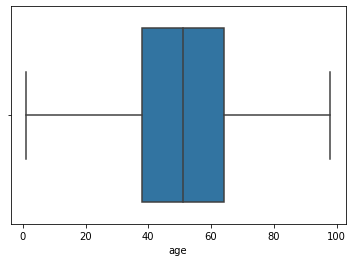

In [0]:
#Use boxplots for status column which would be our target variable.

sns.boxplot(x=hypo['age'])

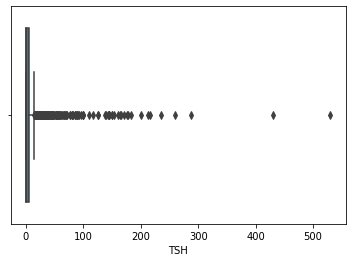

In [54]:
#Boxplot to show distribution of patients with thyroid disorder
sns.boxplot(x=hypo['TSH'])

There is outliers because majority who are negative for hypothyroid show very high TSH.

In [55]:
#We can view the characteristics of the data point that is far away from other datapoints.
#View the row that has the outlier 
point= hypo[hypo["TSH"] >= 500]
point

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
31,0,59.0,F,f,f,f,f,f,f,f,f,f,f,f,y,530.0,y,2.0,y,10.0,y,1.12,y,8.5,n,31.283077


There is one outlier of a female aged 59 years and due to her age there is a high posibility of having thyroid gland disorder. This information is relevantly true.

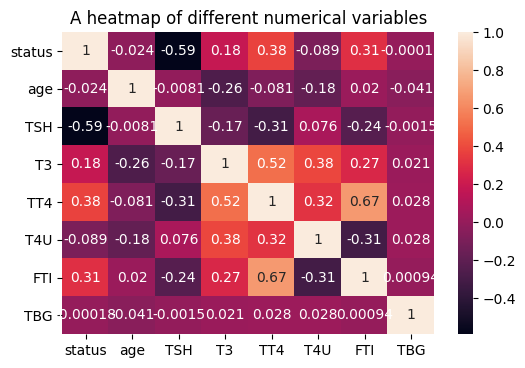

In [56]:
#  checking for correlation of numerical variables

plt.figure(dpi=100)

sns.heatmap(hypo.corr(),annot=True)
plt.title('A heatmap of different numerical variables')

plt.show()

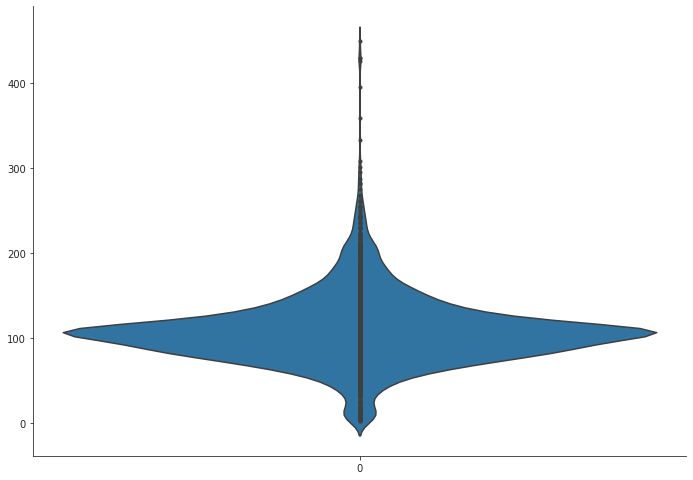

In [57]:
# plot using subplots
sns.set_style('ticks')
fig, ax = plt.subplots()

#  Set the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=hypo['TT4'], inner="points", ax=ax)    
sns.despine()

Most patients have TT4 of 100 - 110

**Bivariate Analysis**

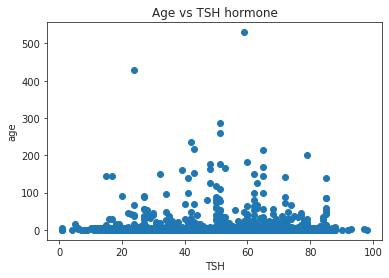

In [58]:
# Plot scatter plot
plt.scatter(hypo["age"],hypo["TSH"])
plt.ylabel("age")
plt.xlabel("TSH")
plt.title("Age vs TSH hormone")
plt.show()

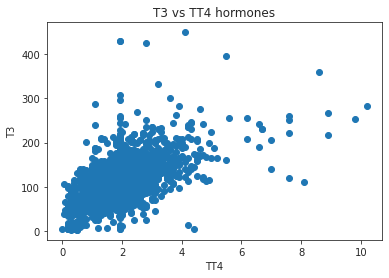

In [59]:
# Plot scatter plot for T3 and T4 hormones
plt.scatter(hypo["T3"],hypo["TT4"])
plt.ylabel("T3")
plt.xlabel("TT4")
plt.title("T3 vs TT4 hormones")
plt.show()

An increase in TT4 hormone leads to an increase in T3 hormone.So there is a strong positive linear relationship between T3 and T4

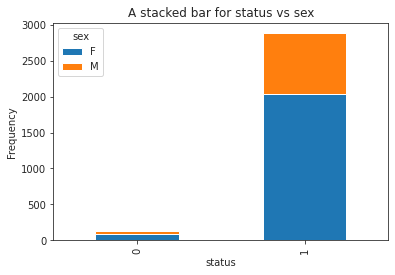

In [60]:
hypo.groupby(['status','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title('A stacked bar for status vs sex')
plt.ylabel('Frequency')
plt.show()

Most patients tested negative for hypothyroid and are female

Most patients that visit Nairobi hospital are female

**Multivariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

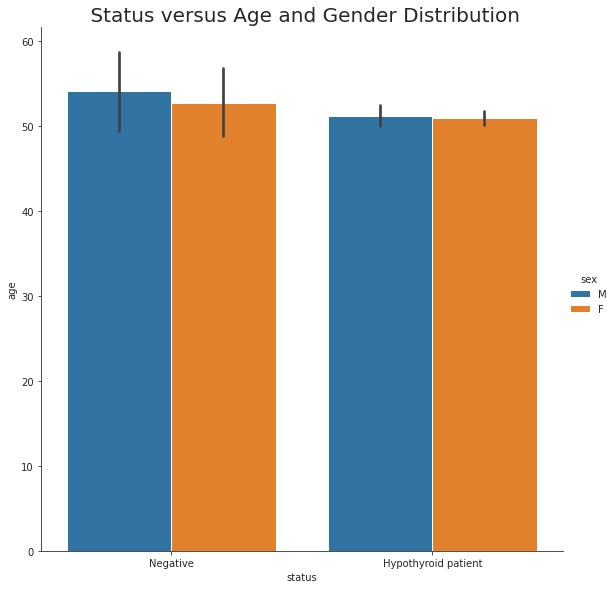

In [62]:
#Plot status by age and gender
sns.factorplot(x='status', y='age', hue="sex" , kind="bar", data=hypo,size=8,aspect= 1);
plt.xticks([0,1], ['Negative',  'Hypothyroid patient'])
plt.title(' Status versus Age and Gender Distribution',fontsize = 20)
plt.show

Most males are between age of 50-60. They are negative of hypothyroid.

Females above 40years have high likelyhood of having hypothyroid

**Data Processing**

In [0]:
y = hypo['status']
y

0       hypothyroid
1       hypothyroid
2       hypothyroid
3       hypothyroid
4       hypothyroid
           ...     
3158       negative
3159       negative
3160       negative
3161       negative
3162       negative
Name: status, Length: 3163, dtype: object

In [0]:
#Change our target values(y) to a binary

y =hypo['status']= np.where(hypo['status']=='hypothyroid',0,1)
print(y)


[0 0 0 ... 1 1 1]


1 means it's negative

0 means it's hypothyroid

In [0]:
X = hypo.drop(['status'], axis=1)
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077
1,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077
2,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,31.283077
3,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,31.283077
4,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,31.283077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,31.283077
3159,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,31.283077
3160,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,31.283077
3161,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,31.283077


In [0]:

from sklearn.model_selection import train_test_split

#Split our dataset train dataset size is 80% test datset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(2530, 25) (633, 25)


In [0]:
pip install category_encoders


     |████████████████████████████████| 81kB 2.1MB/s 


In [0]:
# encode categorical variables with one-hot encoding to numeric
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [0]:
print(X_train.head(4))


       age  sex_1  sex_2  on_thyroxine_1  ...  TBG_48  TBG_49  TBG_50  TBG_51
2949  70.0      1      0               1  ...       0       0       0       0
1763  87.0      1      0               0  ...       0       0       0       0
349   40.0      1      0               0  ...       0       0       0       0
988   74.0      1      0               0  ...       0       0       0       0

[4 rows x 92 columns]


In [0]:
#Confirm there is no nan in train dataset.
np.any(np.isnan(X_train))

False

In [0]:
# confirm if there is no nan the test train
np.any(np.isnan(X_test))

False

**Feature Scaling**

Used to normalize the range of independent variables or features of data. 

We use robust scaler to normalize our independent variables

In [0]:
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

**Random Forest Classifiers with 10 Decision Trees**

In [0]:
# Intiate the randomforestclassifier 
rf = RandomForestClassifier(random_state=0)

# fit the model
rf.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9763


In [0]:
#error rate of the model.

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.1539372679517698


In [0]:
#Compute the confusion matrix to compare the actual versus predicted variables.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[ 17,   9],
       [  6, 601]])

**Findings**

>The model accuracy still remained the same 97% even after the number of decision trees.The error rate is very minimal : 0.15

>The model predicted 601 patients were negative while in the actual they were negative.

>The model predicted 17 patients had hypotyroid while in the actual they were.
This means the accuracy of the model is not affected by the change in decision trees.





**Gradient Boosting Classifier**

In [0]:
#Intiate the gradient boosting classifier
#Define classifier as  gradient
gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=3,min_samples_split=2) # defining my classifier as  gradient

#fit the train dataset in the classifier
gradient.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
#Making a prediction
y_predict = gradient.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [0]:
#Check the accuracy score of the gradient model
print("gradient_Accuracy score is :",metrics.accuracy_score(y_test, y_predict))

gradient_Accuracy score is : 0.9842022116903634


In [0]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion_mat = confusion_matrix(y_test,y_predict)
confusion_mat

array([[ 23,   3],
       [  7, 600]])

**Findings**

>The accuracy score of the model increased to 98%.

>The model predicted 600 patients were negative while in the actual they were negative.

>The model predicted 23 patients had hypothyroid while in the actual they were.

>we can use the gradient boosting classifier model in this case as compared to random forest as it's perfomance increased .

**SVM (Support Vector Machine)**

In [0]:
#we are solving a classifier.
#we will create svm before parameter tuning and after parameter tuning using rbf. 
# SVM before parameter tuning
svm  = SVC(kernel = 'linear',C=1.0,gamma='auto',random_state=2)

#SVM after parameter tuning. RBf is used to increase the dimension
svm_rbf = SVC(kernel = 'rbf',C=1.0,gamma='auto',random_state=0)

#SVM after parameter tuning. RBf is used to increase the dimension
clf = SVC(kernel = 'sigmoid',C=1.0,gamma='auto',random_state=0)

In [65]:
#  fitting the train into the model

#For linear
svm.fit(X_train,y_train)

#For rbf
svm_rbf.fit(X_train,y_train)

#For sigmoid
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# Now that we have trained our model, let's test how well it can predict if a patient is negattive or positive for hypothyroid

#Making predictions for linear
y_pred_svc = svm.predict(X_test)

#Making predictions for rbf
y_pred_rbf = svm_rbf.predict(X_test)

#Making predictions with parameter tuning
y_pred1 = clf.predict(X_test)

In [67]:
#Check accuracy of model before setting any parameters
print("Accuracy with linear kernel:",metrics.accuracy_score(y_test, y_pred_svc))

#Accuracy score using rbf function
print("Accuracy with rbf kernel : ", accuracy_score(y_test,y_pred_rbf))

#Accuracy score using sigmoid function
print("Accuracy with sigmoid kernel : ", accuracy_score(y_test,y_pred))

Accuracy with linear kernel: 0.976303317535545
Accuracy with rbf kernel :  0.9731437598736177
Accuracy with sigmoid kernel :  0.976303317535545


**Findings**

Reason behind not plotting the graph to show the hyperplane is that we were dealing with multiple features so it would have been pretty hard to visualize.

The accuracy score of models was 97.6% after tuning the parameters using linear, the model accuracy decreased to 97.3%. Sigmoid is 97.6%


**Further questions**

Based on the fact that our dataset had many patients with negative results on hypothyroid,did it affect the model accuracy to be that high even after using advanced models?

**Challenges**

Despite using different classification models, differences between the model accuracy was very minimal.
It was a challenge picking the best model for prediction since they all had almost the same accuracy score and very low error rate.

**Future prospects**

Dataset should be evenly distributed interms of status to avoid model overfitting.